In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

In [3]:
data_population = pd.read_csv('data/POP_BY_COUNTRY/API_SP.POP.TOTL_DS2_en_csv_v2_10515200.csv', dtype='unicode', skiprows=4)
data_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211,55438,56225,56695,57032,57360,...,101669,102053,102577,103187,103795,104341,104822,105264,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351,9166764,9345868,9533954,9731361,9938414,...,28803167,29708599,30696958,31731688,32758020,33736494,34656032,35530081,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182,5753024,5866061,5980417,6093321,6203299,...,23369131,24218565,25096150,25998340,26920466,27859305,28813463,29784193,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411,14375,15370,16412,17469,18549,...,84449,83751,82431,80788,79223,78014,77281,76965,NaN,NaN


In [4]:
data_population[data_population['Country Name'] == 'Brazil']

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
27,Brazil,BRA,"Population, total",SP.POP.TOTL,72207554,74351763,76573248,78854019,81168654,83498020,...,196796269,198686688,200560983,202408632,204213133,205962108,207652865,209288278,NaN,NaN


In [53]:
data_poverty = pd.read_csv('data/OUR_WORLD_IN_DATA/world-population-in-extreme-poverty-absolute.csv', dtype='unicode')
data_poverty[['Year', 'Number of people not in extreme poverty (people)', 'Number of people living in extreme poverty (people)']] = data_poverty[['Year', 'Number of people not in extreme poverty (people)', 'Number of people living in extreme poverty (people)']].apply(pd.to_numeric)
data_poverty = data_poverty.sort_values(by=['Year'])
data_poverty = data_poverty[data_poverty['Year'] > 1980]
data_poverty['Number of people'] = data_poverty['Number of people not in extreme poverty (people)'] + data_poverty['Number of people living in extreme poverty (people)']
data_poverty['Number of people not in extreme poverty (people)'] = data_poverty['Number of people not in extreme poverty (people)'] / 10**9
data_poverty['Number of people living in extreme poverty (people)'] = data_poverty['Number of people living in extreme poverty (people)'] / 10**9
data_poverty['Number of people'] = data_poverty['Number of people'] / 10**9
data_poverty = data_poverty.round(2)
data_poverty.head()

,Entity,Code,Year,Number of people not in extreme poverty (people),Number of people living in extreme poverty (people),Number of people
10,World,OWID_WRL,1981,2.61,1.91,4.52
11,World,OWID_WRL,1984,2.90,1.87,4.77
12,World,OWID_WRL,1987,3.25,1.78,5.03
13,World,OWID_WRL,1990,3.41,1.90,5.31
14,World,OWID_WRL,1993,3.68,1.89,5.57


# Scatter plot

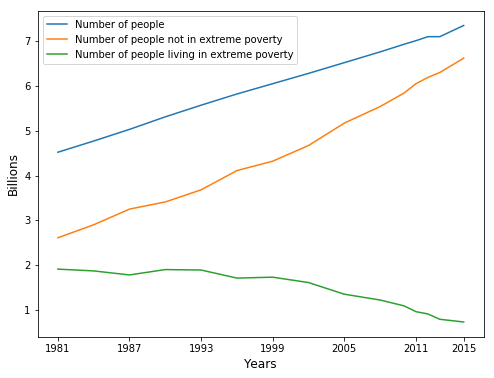

In [54]:
plt.figure(figsize=(8, 6))
plt.plot(data_poverty['Year'], data_poverty['Number of people'])
plt.plot(data_poverty['Year'], data_poverty['Number of people not in extreme poverty (people)'])
plt.plot(data_poverty['Year'], data_poverty['Number of people living in extreme poverty (people)'])
plt.xticks(np.concatenate((np.arange(1981, 2012, step=6), np.array([2015])), axis=0))
plt.xlabel('Years', fontsize=12)
plt.ylabel('Billions', fontsize=12)
plt.legend(['Number of people', 'Number of people not in extreme poverty', 'Number of people living in extreme poverty'], loc='upper left')
plt.show()

# Area chart

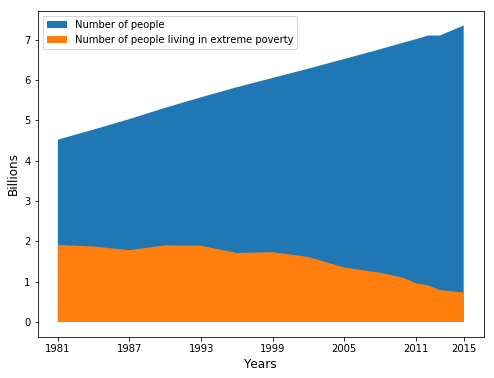

In [55]:
plt.figure(figsize=(8, 6))
plt.fill_between(data_poverty['Year'], data_poverty['Number of people'])
plt.fill_between(data_poverty['Year'], data_poverty['Number of people living in extreme poverty (people)'])
plt.xticks(np.concatenate((np.arange(1981, 2012, step=6), np.array([2015])), axis=0))
plt.xlabel('Years', fontsize=12)
plt.ylabel('Billions', fontsize=12)
plt.legend(['Number of people', 'Number of people living in extreme poverty'], loc='upper left')
plt.show()

In [56]:
# relative data to build 100% stacked 
data_relative = data_poverty[['Number of people not in extreme poverty (people)', 'Number of people living in extreme poverty (people)']]
data_relative = data_relative.divide(data_relative.sum(axis=1), axis=0)

# Stacked area chart

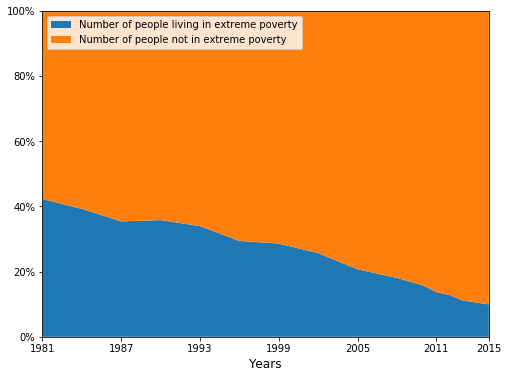

In [57]:
fig, ax = plt.subplots(figsize=(8, 6))

# ax.stackplot(data_poverty['Year'],  data_relative['Number of people not in extreme poverty (people)'],  data_relative['Number of people living in extreme poverty (people)'], labels=['Number of people not in extreme poverty', 'Number of people living in extreme poverty'])
ax.stackplot(data_poverty['Year'], data_relative['Number of people living in extreme poverty (people)'],  data_relative['Number of people not in extreme poverty (people)'], labels=['Number of people living in extreme poverty', 'Number of people not in extreme poverty'])
ax.margins(0,0)
ax.set_xticks(np.concatenate((np.arange(1981, 2012, step=6), np.array([2015])), axis=0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.xlabel('Years', fontsize=12)
plt.legend(loc='upper left')
plt.show()

# Iterative visualizations

In [135]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=data_poverty['Year'],
    y=data_poverty['Number of people living in extreme poverty (people)'],
    stackgroup='one',
    mode='none',
    name='Living in extreme poverty',
    hoverinfo='y'
)

trace2 = go.Scatter(
    x=data_poverty['Year'],
    y=data_poverty['Number of people not in extreme poverty (people)'],
    stackgroup='one',
    mode='none',
    name='Not in extreme poverty ',
    hoverinfo='y'
)

data = [trace1, trace2]

layout = go.Layout(
    xaxis = go.layout.XAxis(
        tickmode='array',
        tickvals=np.concatenate((np.arange(1981, 2012, step=6), np.array([2015])), axis=0),
        title='Years',
        ticklen=5
    ),
    yaxis = go.layout.YAxis(
        title='Population (billion)',
        ticksuffix='B ',       
    ),
    title='World population living in extreme poverty, 1981-2015',
    annotations=[
        dict(
        text='Extreme poverty is defined as living on less than $1.90 international per day',
        font=dict(size=13),
        showarrow=False,
        x=0.6,
        y=1.1,
        xref='paper',
        yref='paper'

        )
    ]
)

fig = go.Figure(
    data = data,
    layout = layout
)

py.iplot(fig, filename='stacked-area-char')

In [133]:
trace1 = go.Scatter(
    x=data_poverty['Year'],
    y=data_relative['Number of people living in extreme poverty (people)'],
    name='Living in extreme poverty',
    stackgroup='one',
    mode='none',
    hoverinfo='y'
)

trace2 = go.Scatter(
    x=data_poverty['Year'],
    y=data_relative['Number of people not in extreme poverty (people)'],
    name='Not in extreme poverty',
    stackgroup='one',
    mode='none',
    hoverinfo='y'
)

data = [trace1, trace2]

layout = go.Layout(
    xaxis = go.layout.XAxis(
        tickmode='array',
        tickvals=np.concatenate((np.arange(1981, 2012, step=6), np.array([2015])), axis=0),
        title='Years',
        ticklen=5,
    ),
    yaxis=go.layout.YAxis(
        tickformat=',.0%',
        title='Population (%)',
    ),
    title='World population living in extreme poverty, 1981-2015',
    annotations=[
        dict(
            text='Extreme poverty is defined as living on less than $1.90 international per day',
            font=dict(size=13),
            showarrow=False,
            x=0.6,
            y=1.1,
            xref='paper',
            yref='paper'
            
        )
    ]
)

fig = go.Figure(
    data = data,
    layout = layout,
)

py.iplot(fig, filename='stacked-relative-area-char')

In [102]:
trace = go.Scatter(
    x=data_poverty['Year'],
    y=data_poverty['Number of people'],
    name='Number of people',
    hoverinfo='y'
)

trace1 = go.Scatter(
    x = data_poverty['Year'],
    y = data_poverty['Number of people not in extreme poverty (people)'],
    name='Number of people not in extreme poverty',
    hoverinfo='y'
)

trace2 = go.Scatter(
    x = data_poverty['Year'],
    y = data_poverty['Number of people living in extreme poverty (people)'],
    name='Number of people living in extreme poverty',
    hoverinfo='y'
)

data = [trace, trace1, trace2]

layout = go.Layout(
    xaxis = go.layout.XAxis(
        tickmode='array',
        tickvals=np.concatenate((np.arange(1981, 2012, step=6), np.array([2015])), axis=0),
        title='Years',
    ),
    yaxis = go.layout.YAxis(
        title='Population (billion)',
        ticksuffix='B ',       
    ),
)

fig = go.Figure(
    data = data,
    layout = layout
)

py.iplot(fig, filename='basic-line')